<Figure size 640x480 with 0 Axes>

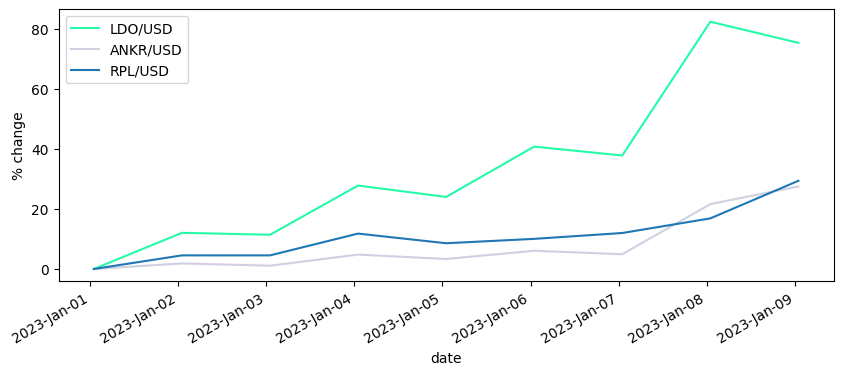

In [43]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('BINANCE_LDOUSDT, 1D.csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))
df = df[df['time'] > datetime.fromisoformat('2023-01-01')]

#df['MoM_pct_change_close']= df['close'].pct_change(fill_method ='ffill')*100
#df['MoM_pct_ANKR']= df['ANKRUSDT, BINANCE: Close'].pct_change(fill_method ='ffill')*100
#df['MoM_pct_RPL']= df['RPLUSD, KRAKEN: Close'].pct_change(fill_method ='ffill')*100 

df['rel_percent_LDO'] = 100*(df['close'] / df['close'].iloc[0]) -100
df['rel_percent_ANKR'] = 100*(df['ANKRUSDT, BINANCE: Close'] / df['ANKRUSDT, BINANCE: Close'].iloc[0]) -100
df['rel_percent_RPL'] = 100*(df['RPLUSD, KRAKEN: Close'] / df['RPLUSD, KRAKEN: Close'].iloc[0]) -100

df.drop(columns = ['Smoothing Line' , 'Rolling POC', 'Volume', 'Volume MA','MA.1','MA.2','Developing VA High', 'Developing Poc', 'Developing VA Low', 'MA','Smoothing Line.2', 'Smoothing Line.1', 'Smoothing Line.3', 'ANKRUSDT, BINANCE: High','ANKRUSDT, BINANCE: Low', 'ANKRUSDT, BINANCE: Open', 'RPLUSD, KRAKEN: Open', 'RPLUSD, KRAKEN: High', 'RPLUSD, KRAKEN: Low', 'open', 'high', 'low', 'EMA'], inplace=True)
# filter the time

x = df['time']
y1 = df['rel_percent_LDO']
y2 = df["rel_percent_ANKR"].ffill()
y3 = df["rel_percent_RPL"].ffill()


fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x, y1, label='LDO/USD', color = (36/255, 251/255, 169/255))
ax.plot(x, y2, label='ANKR/USD', color =(208/255, 208/255, 208/235))
ax.plot(x, y3, label='RPL/USD') 

ax.set_ylabel('% change')


ax.set_xlabel('date')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
fig.autofmt_xdate()


ax.legend()
